Simple non linear regression with pytorch

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
n_samples = 500
x_data = np.random.randn(n_samples, 1).flatten()
eps = np.random.normal(0.0, 1.0, n_samples)
y_data = 3.*np.sin(2.*x_data) + eps
data = pd.DataFrame({"x_data": x_data,
                     "y_data": y_data})

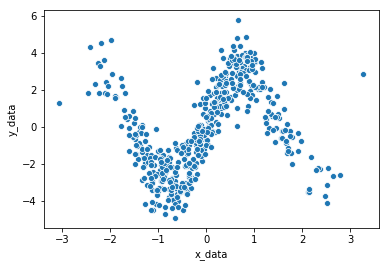

In [5]:
sns.scatterplot(x="x_data",
                y="y_data",
                data = data)

In [6]:
from torch.utils.data import Dataset, DataLoader

class NLRDataset(Dataset):
    def __init__(self, x, y):
        super(NLRDataset, self).__init__()
        
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x_data = self.x
        y_data = self.y
        return x_data[idx], y_data[idx]

In [13]:
def make_dataset(x_data, y_data, num_samples):
    train_num = int(0.8 * num_samples)
    train_x, test_x = x_data[:train_num], x_data[train_num:]
    train_y, test_y = y_data[:train_num], y_data[train_num:]
    train_dataset = NLRDataset(train_x, train_y)
    test_dataset = NLRDataset(test_x, test_y)
    partition_dictionary = {"train_set": train_dataset,
                            "test_set": test_dataset}
    
    return partition_dictionary

In [14]:
make_dataset(x_data, y_data, 500)

{'train_set': <__main__.NLRDataset at 0x19719e52eb8>,
 'test_set': <__main__.NLRDataset at 0x19719e52198>}